1) How will you address null values and what is your strategy for addressing the outliers in the data?
2) Understand the data granularity and see if some of the data needs to be deleted
3) Create Time series plots of different intervals to understand time series behavior in the data
4) Understand if there is trend/seasonality present
5) Run necessary tests to check stationarity of the data

In [41]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_percentage_error as mape

In [3]:
data = pd.read_csv(r'C:\Users\USER\Downloads\gold_price_data.csv',index_col='Date', parse_dates=['Date'], dayfirst=False)

In [5]:
data.tail()

,Value
Date,
2020-03-09,1672.50
2020-03-10,1655.70
2020-03-11,1653.75
2020-03-12,1570.70
2020-03-13,1562.80


In [6]:
data.describe()

,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10787 entries, 1970-01-01 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   10787 non-null  float64
dtypes: float64(1)
memory usage: 168.5 KB


In [9]:
# Maximum and minimum date in the data
data.index.min(), df.index.max()

(Timestamp('1970-01-01 00:00:00'), Timestamp('2020-03-13 00:00:00'))

# addressing null values 

In [10]:
data.isnull().sum()

Value    0
dtype: int64

In [12]:
# Maximum and minimum date in the data
df.index.min(), df.index.max()

(Timestamp('1970-01-01 00:00:00'), Timestamp('2020-03-13 00:00:00'))

In [44]:
import seaborn as sns

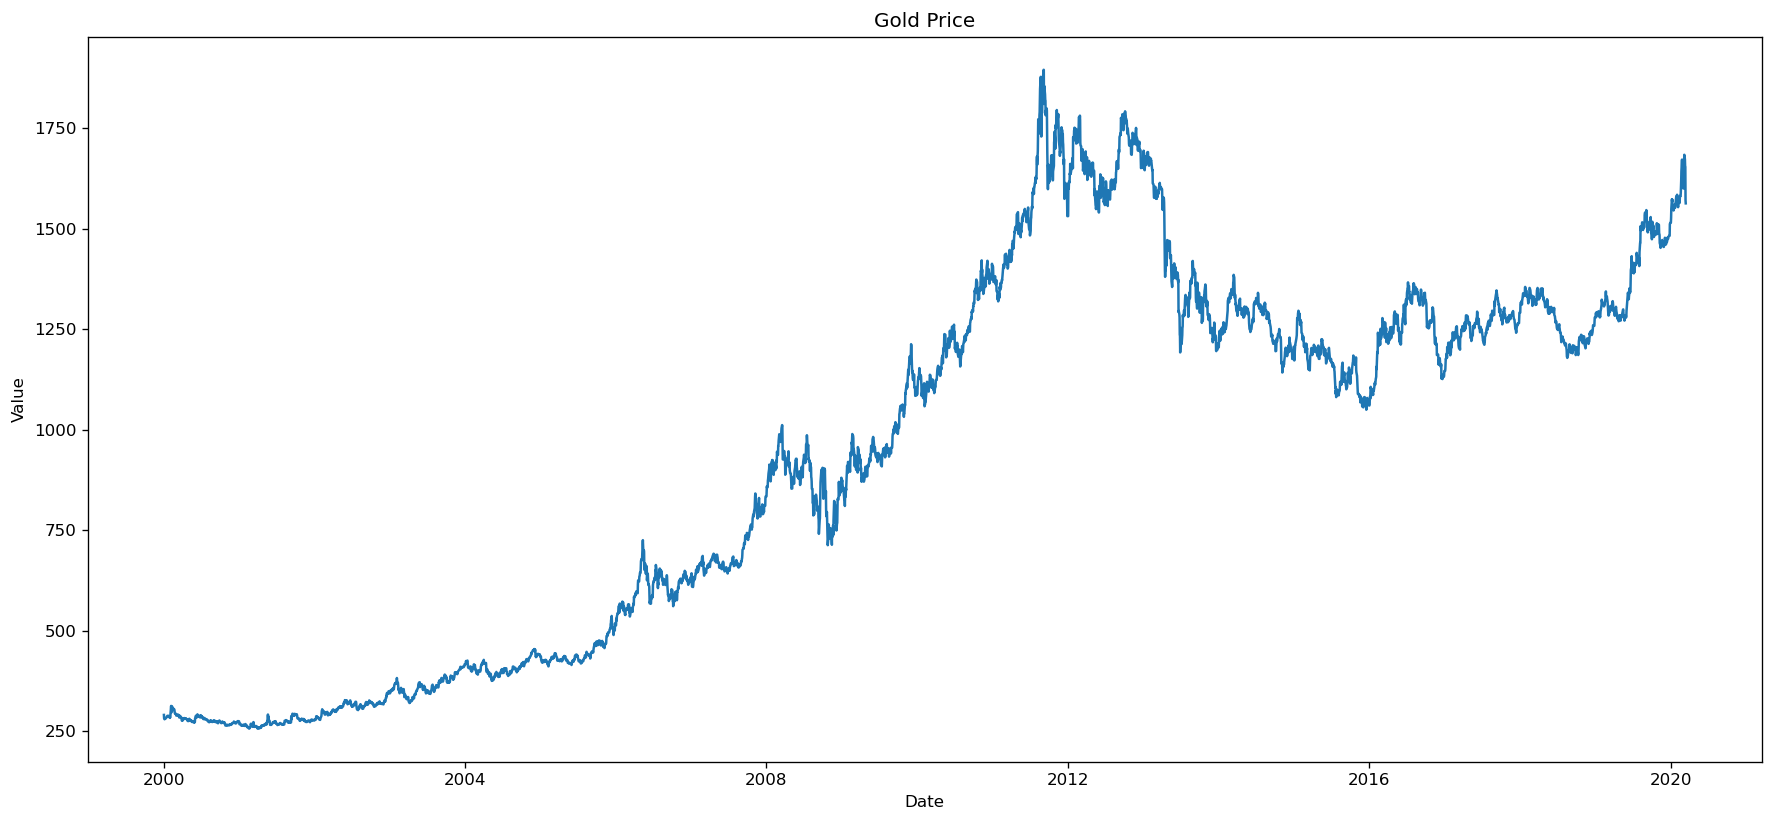

In [46]:
plt.figure(figsize = (18,8))
sns.lineplot(data=data, x="Date", y="Value")
plt.title('Gold Price')
plt.show()

In [14]:
#We wil filter this data from the year 2000 onwards
data= df[(pd.DatetimeIndex(df.index).year>=2000)]
data.head()

,Value
Date,
2000-01-03,290.25
2000-01-04,281.50
2000-01-05,280.45
2000-01-06,279.40
2000-01-07,282.10


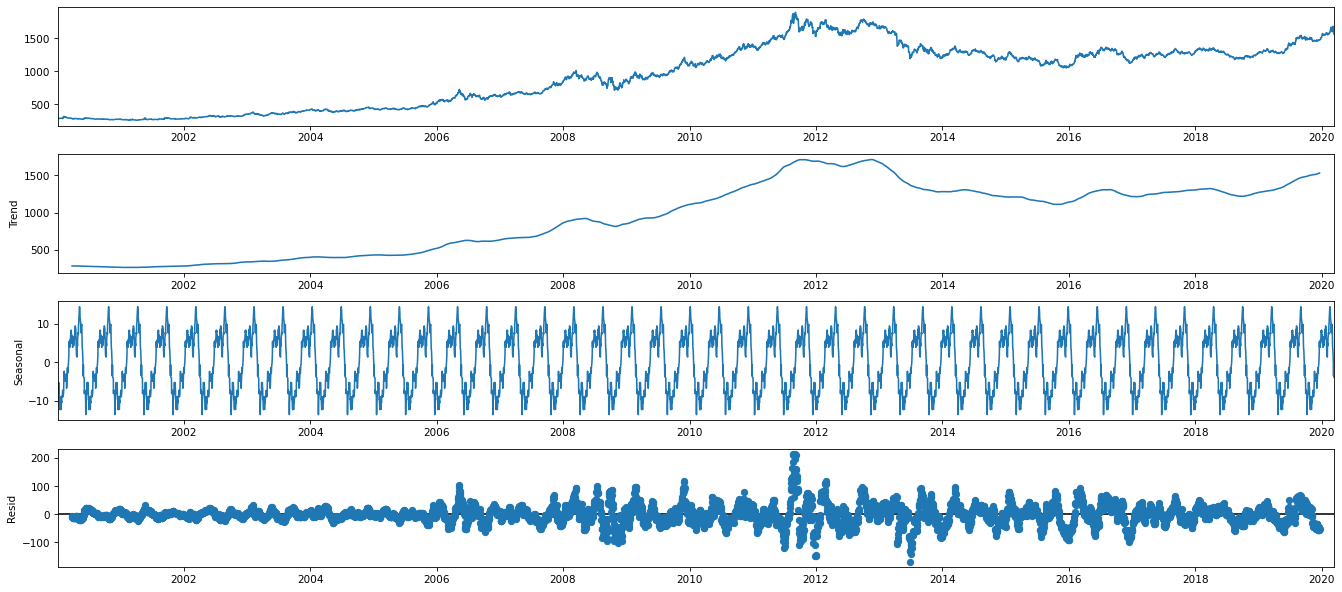

In [49]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})
result = seasonal_decompose(gold_eda, model='additive', period=120)
result.plot()
plt.show()

or

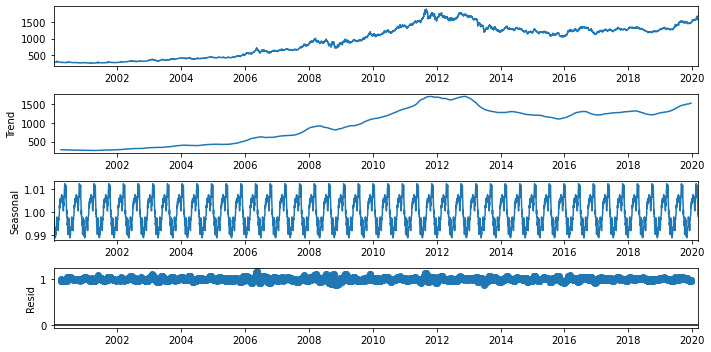

In [16]:
rcParams['figure.figsize'] = 10,5

result = seasonal_decompose(data, model='multiplicative', period=120)
result.plot()
plt.show()

checking constant mean

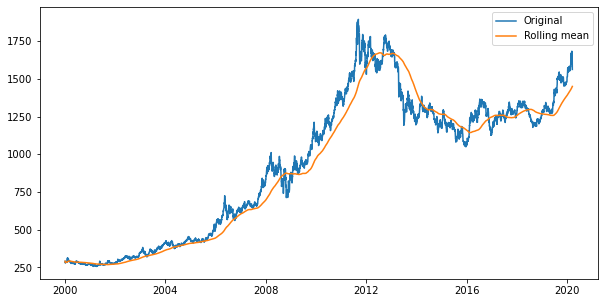

In [18]:
#Finding 1 year rolling average
rcParams['figure.figsize'] = 10,5
plt.plot(data, label='Original')
plt.plot(data.rolling('365D').mean(), label='Rolling mean')
plt.legend()
plt.show() 

There is no constant mean.

In [ ]:
# Dickey Fuler Test

from statsmodels.tsa.stattools import adfuller

def adf(data):
    rcParams['figure.figsize'] = 10,5
    dftest = adfuller(data, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test statistics','p-value','number of lags used','number of observations'])
    #critical values are stored in dictionary format
    for key,value in dftest[4].items():
        adf['Critical values({})'.format(key)] = value
    return adf, data.plot()

(Test statistics             -0.773534
 p-value                      0.826773
 number of lags used         32.000000
 number of observations    5237.000000
 Critical values(1%)         -3.431599
 Critical values(5%)         -2.862092
 Critical values(10%)        -2.567064
 dtype: float64,
 <AxesSubplot:xlabel='Date'>)

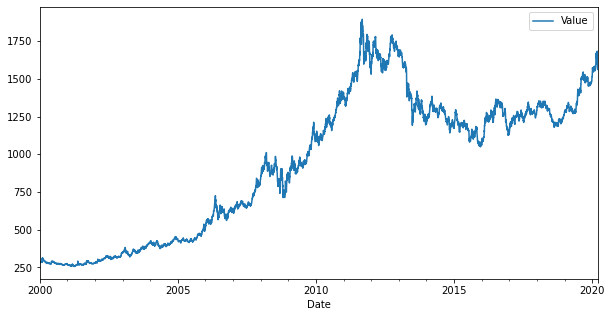

In [22]:
adf(data)

The p-value is > 0.05. so we accept the null hypothesis

# 1st order differencing

(Test statistics          -1.404711e+01
 p-value                   3.226024e-26
 number of lags used       3.100000e+01
 number of observations    5.237000e+03
 Critical values(1%)      -3.431599e+00
 Critical values(5%)      -2.862092e+00
 Critical values(10%)     -2.567064e+00
 dtype: float64,
 <AxesSubplot:xlabel='Date'>)

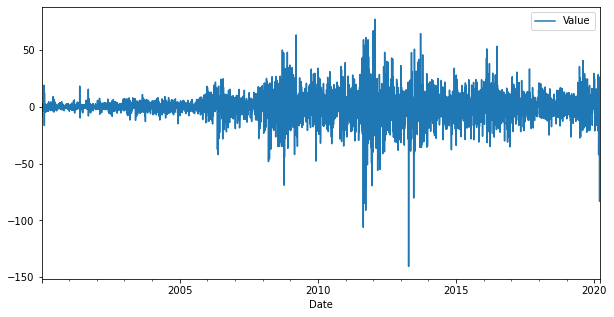

In [24]:
adf(data.diff().dropna())

# 2nd order differencing

(Test statistics            -20.948124
 p-value                      0.000000
 number of lags used         33.000000
 number of observations    5234.000000
 Critical values(1%)         -3.431600
 Critical values(5%)         -2.862092
 Critical values(10%)        -2.567064
 dtype: float64,
 <AxesSubplot:xlabel='Date'>)

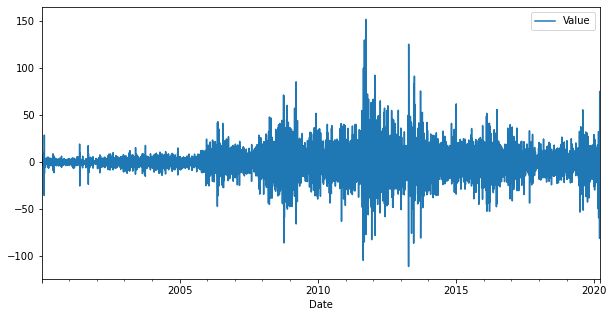

In [25]:
adf(data.diff().diff().dropna())

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

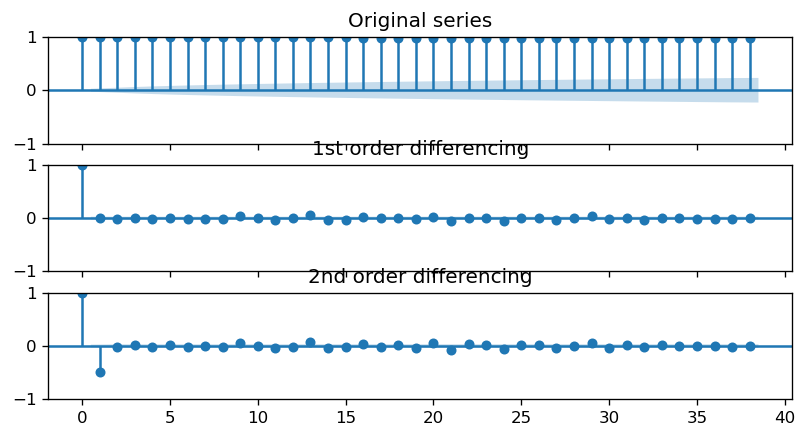

In [28]:
plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':120})
fig, axes = plt.subplots(3, 1, sharex=True)
plot_acf(data, ax=axes[0])
axes[0].set_title('Original series')

plot_acf(data.diff().dropna(), ax=axes[1])
axes[1].set_title('1st order differencing')

plot_acf(data.diff().diff().dropna(), ax=axes[2])
axes[2].set_title('2nd order differencing')
plt.show()

Lags in 2nd differencing fall into negative zone very quickly, indicating the series may have been over differenced. Thus, 1st differencing should be chosen.

In [30]:
# Time series libraries
from pmdarima.arima.utils import ndiffs

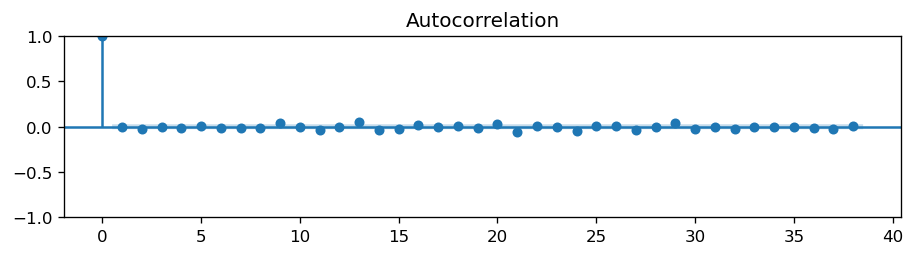

In [31]:
# Order of MA term (q)
# ACF function
rcParams['figure.figsize'] = 9,2
plot_acf(data.diff().dropna())
plt.show()

In [33]:
# Building the model
import statsmodels as sm

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
model = sm.tsa.arima.model.ARIMA(data, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                 5270
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -20217.508
Date:                Tue, 11 Oct 2022   AIC                          40441.017
Time:                        21:08:15   BIC                          40460.726
Sample:                    01-03-2000   HQIC                         40447.906
                         - 03-13-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8588      0.089     -9.602      0.000      -1.034      -0.684
ma.L1          0.8716      0.086     10.172      0.000       0.704       1.040
sigma2       125.9977      0.915    137.662      0.0

As we can see, the model closely matches the reality. In reality, there are overlaps. Overfitting is indicated. As a result, we divided the data into train and test sets.